In [19]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Please check documentation to understand how to use simulation class to load data
from load_file import simulation

In [21]:
# Use information in the map_sim_to_design file to find the corresponding design files for each simulation batch
maps_sim_design = {}
with open('../simulation_data/map_sim_to_design') as f:
    for l in f:
        l = l.split('\n')[0]
        maps_sim_design[l.split(' ')[1]]=l.split(' ')[2]

## 1. Load the simulation data.

We run our simulations in batches. Our simulation is stochastic. Each design batch can have different number of events per design point. This mean our simulation data has different statistical uncertainties depending on the design batch. We need to take this into account when building emulators. That's the goal of this notebook.


In [22]:
# We use a class object to load data from each simulation batch.
# sim_d*_e&_train/test_b@: here * stands for number of design points and & for number of events per design
# @ for the batch number
name = 'mean_for_300_sliced_200_events_design'

sim_d300_e200_train = simulation(f'../simulation_data/{name}',
                                 '../simulation_data/'+'sd'+name.split('mean')[-1],
                         f'../design_data/{maps_sim_design[name]}',
                        f'../simulation_data/nevents_design/{name}_neve.txt')

###############
# The following two simulations have the same design points but different events per desing.
# Let's use it to understand how the statistical error changes as the number of events increase.
name = 'mean_for_50_sliced_200_events_test_design'
sim_d50_e200_test = simulation(f'../simulation_data/{name}',
                               '../simulation_data/'+'sd'+name.split('mean')[-1],
                         f'../design_data/{maps_sim_design[name]}',
                        f'../simulation_data/nevents_design/{name}_neve.txt')

name = 'mean_for_90_sliced_test_design_800_events_design'
sim_d90_e800_test = simulation(f'../simulation_data/{name}',
                               '../simulation_data/'+'sd'+name.split('mean')[-1],
                         f'../design_data/{maps_sim_design[name]}',
                        f'../simulation_data/nevents_design/{name}_neve.txt')
################

name = 'mean_for_90_add_batch0_800_events_design'
sim_d90_e800_train_b1 = simulation(f'../simulation_data/{name}',
                                   '../simulation_data/'+'sd'+name.split('mean')[-1],
                         f'../design_data/{maps_sim_design[name]}',
                        f'../simulation_data/nevents_design/{name}_neve.txt')

name = 'mean_for_90_add_batch1_800_events_design'
sim_d90_e800_train_b2 = simulation(f'../simulation_data/{name}',
                                   '../simulation_data/'+'sd'+name.split('mean')[-1],
                         f'../design_data/{maps_sim_design[name]}',
                        f'../simulation_data/nevents_design/{name}_neve.txt')
#################
# High accuracy runs
name = 'mean_for_75_batch0_design_1600_events_design'
sim_d75_e1600_train_b1 = simulation(f'../simulation_data/{name}',
                                   '../simulation_data/'+'sd'+name.split('mean')[-1],
                         f'../design_data/{maps_sim_design[name]}',
                        f'../simulation_data/nevents_design/{name}_neve.txt')


In [23]:
def get_label(file_name):
    words = file_name.split('_')
    designs = words[1].split('d')[1]
    events = words[2].split('e')[1]
    purpose = words[3]
    if len(words)>4:
        batch = words[4].split('b')[1]
        return f'd={designs},e={events},b={batch} to {purpose}'
    else:
        return f'd={designs},e={events} to {purpose}'

In [26]:
df_list=[sim_d300_e200_train,sim_d90_e800_test,sim_d90_e800_train_b1,sim_d90_e800_train_b2, sim_d75_e1600_train_b1]
df_list_name=['sim_d300_e200_train','sim_d90_e800_test','sim_d90_e800_train_b1','sim_d90_e800_train_b2','sim_d75_e1600_train_b1' ]
N = len(df_list)

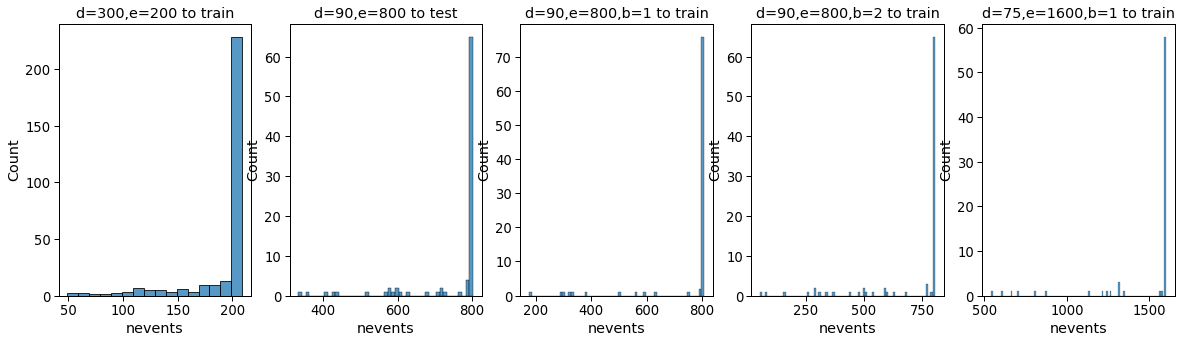

In [27]:
sns.set_context('paper', font_scale=1.5)
fig, ax = plt.subplots(1,N, figsize=(20,5))
for i in range(0,N):
    sns.histplot(df_list[i].events,x='nevents', binwidth=10 , ax=ax[i])
    ax[i].set_title(label=get_label(df_list_name[i]))


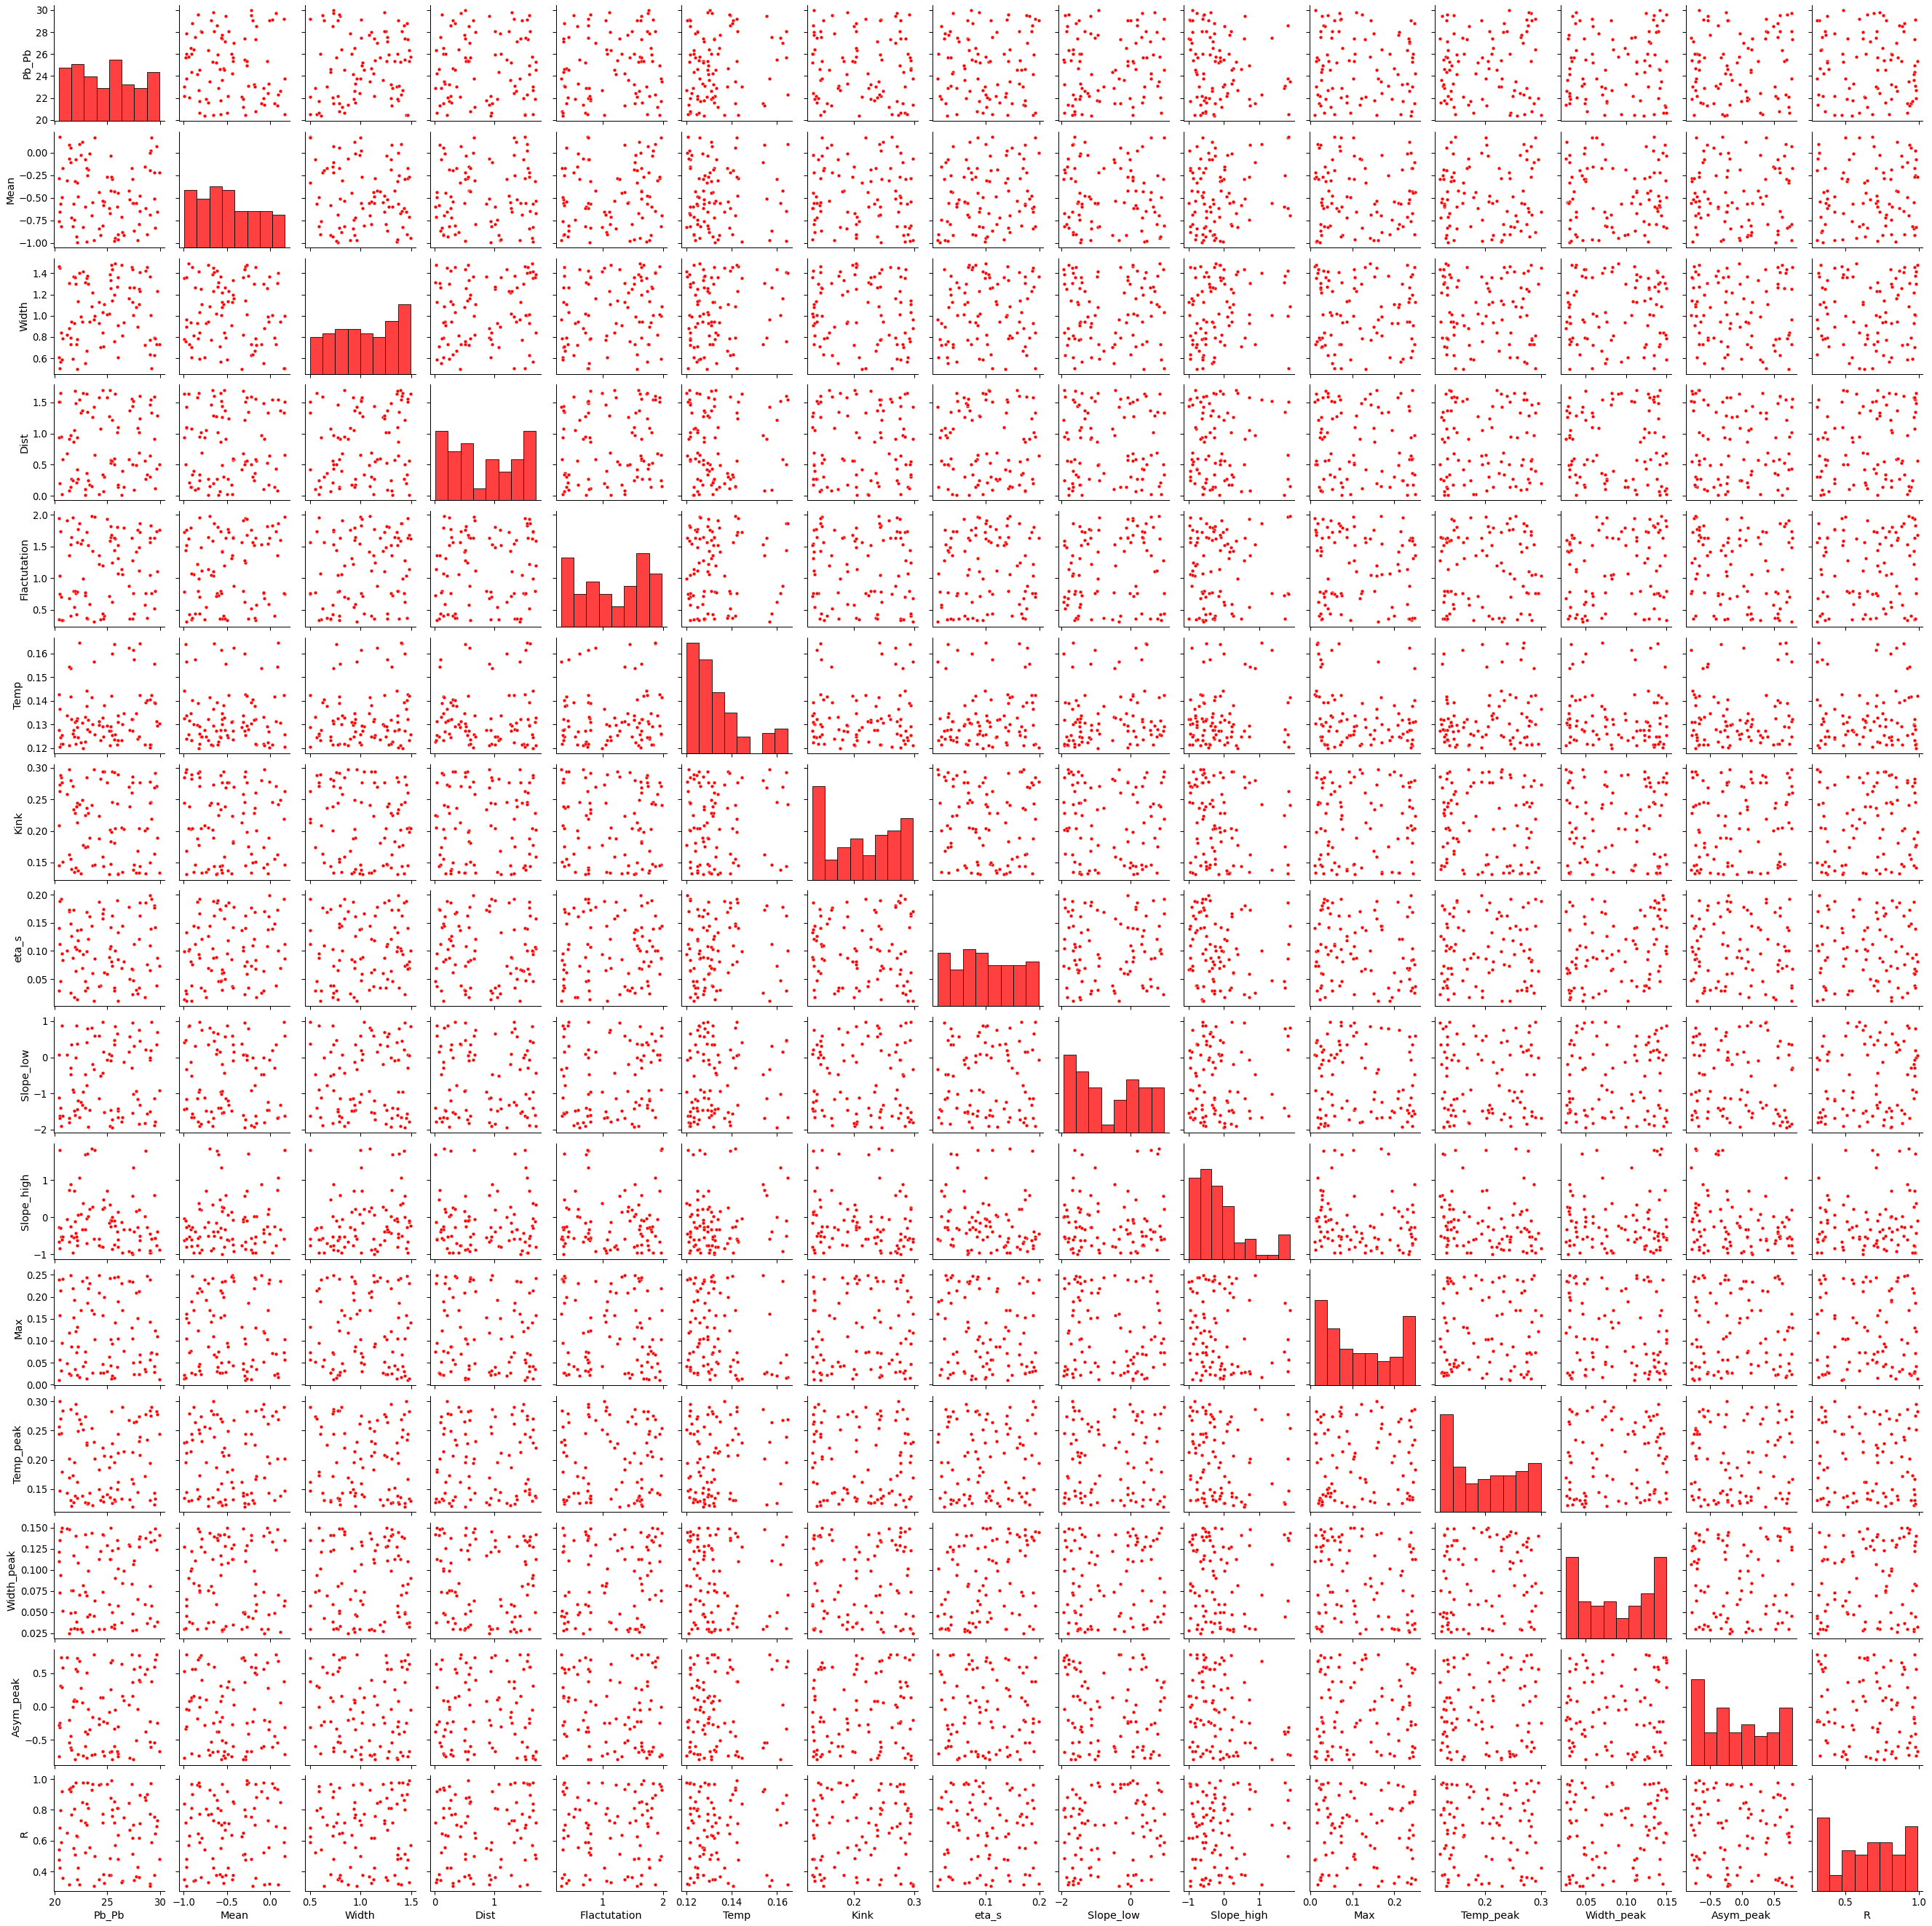

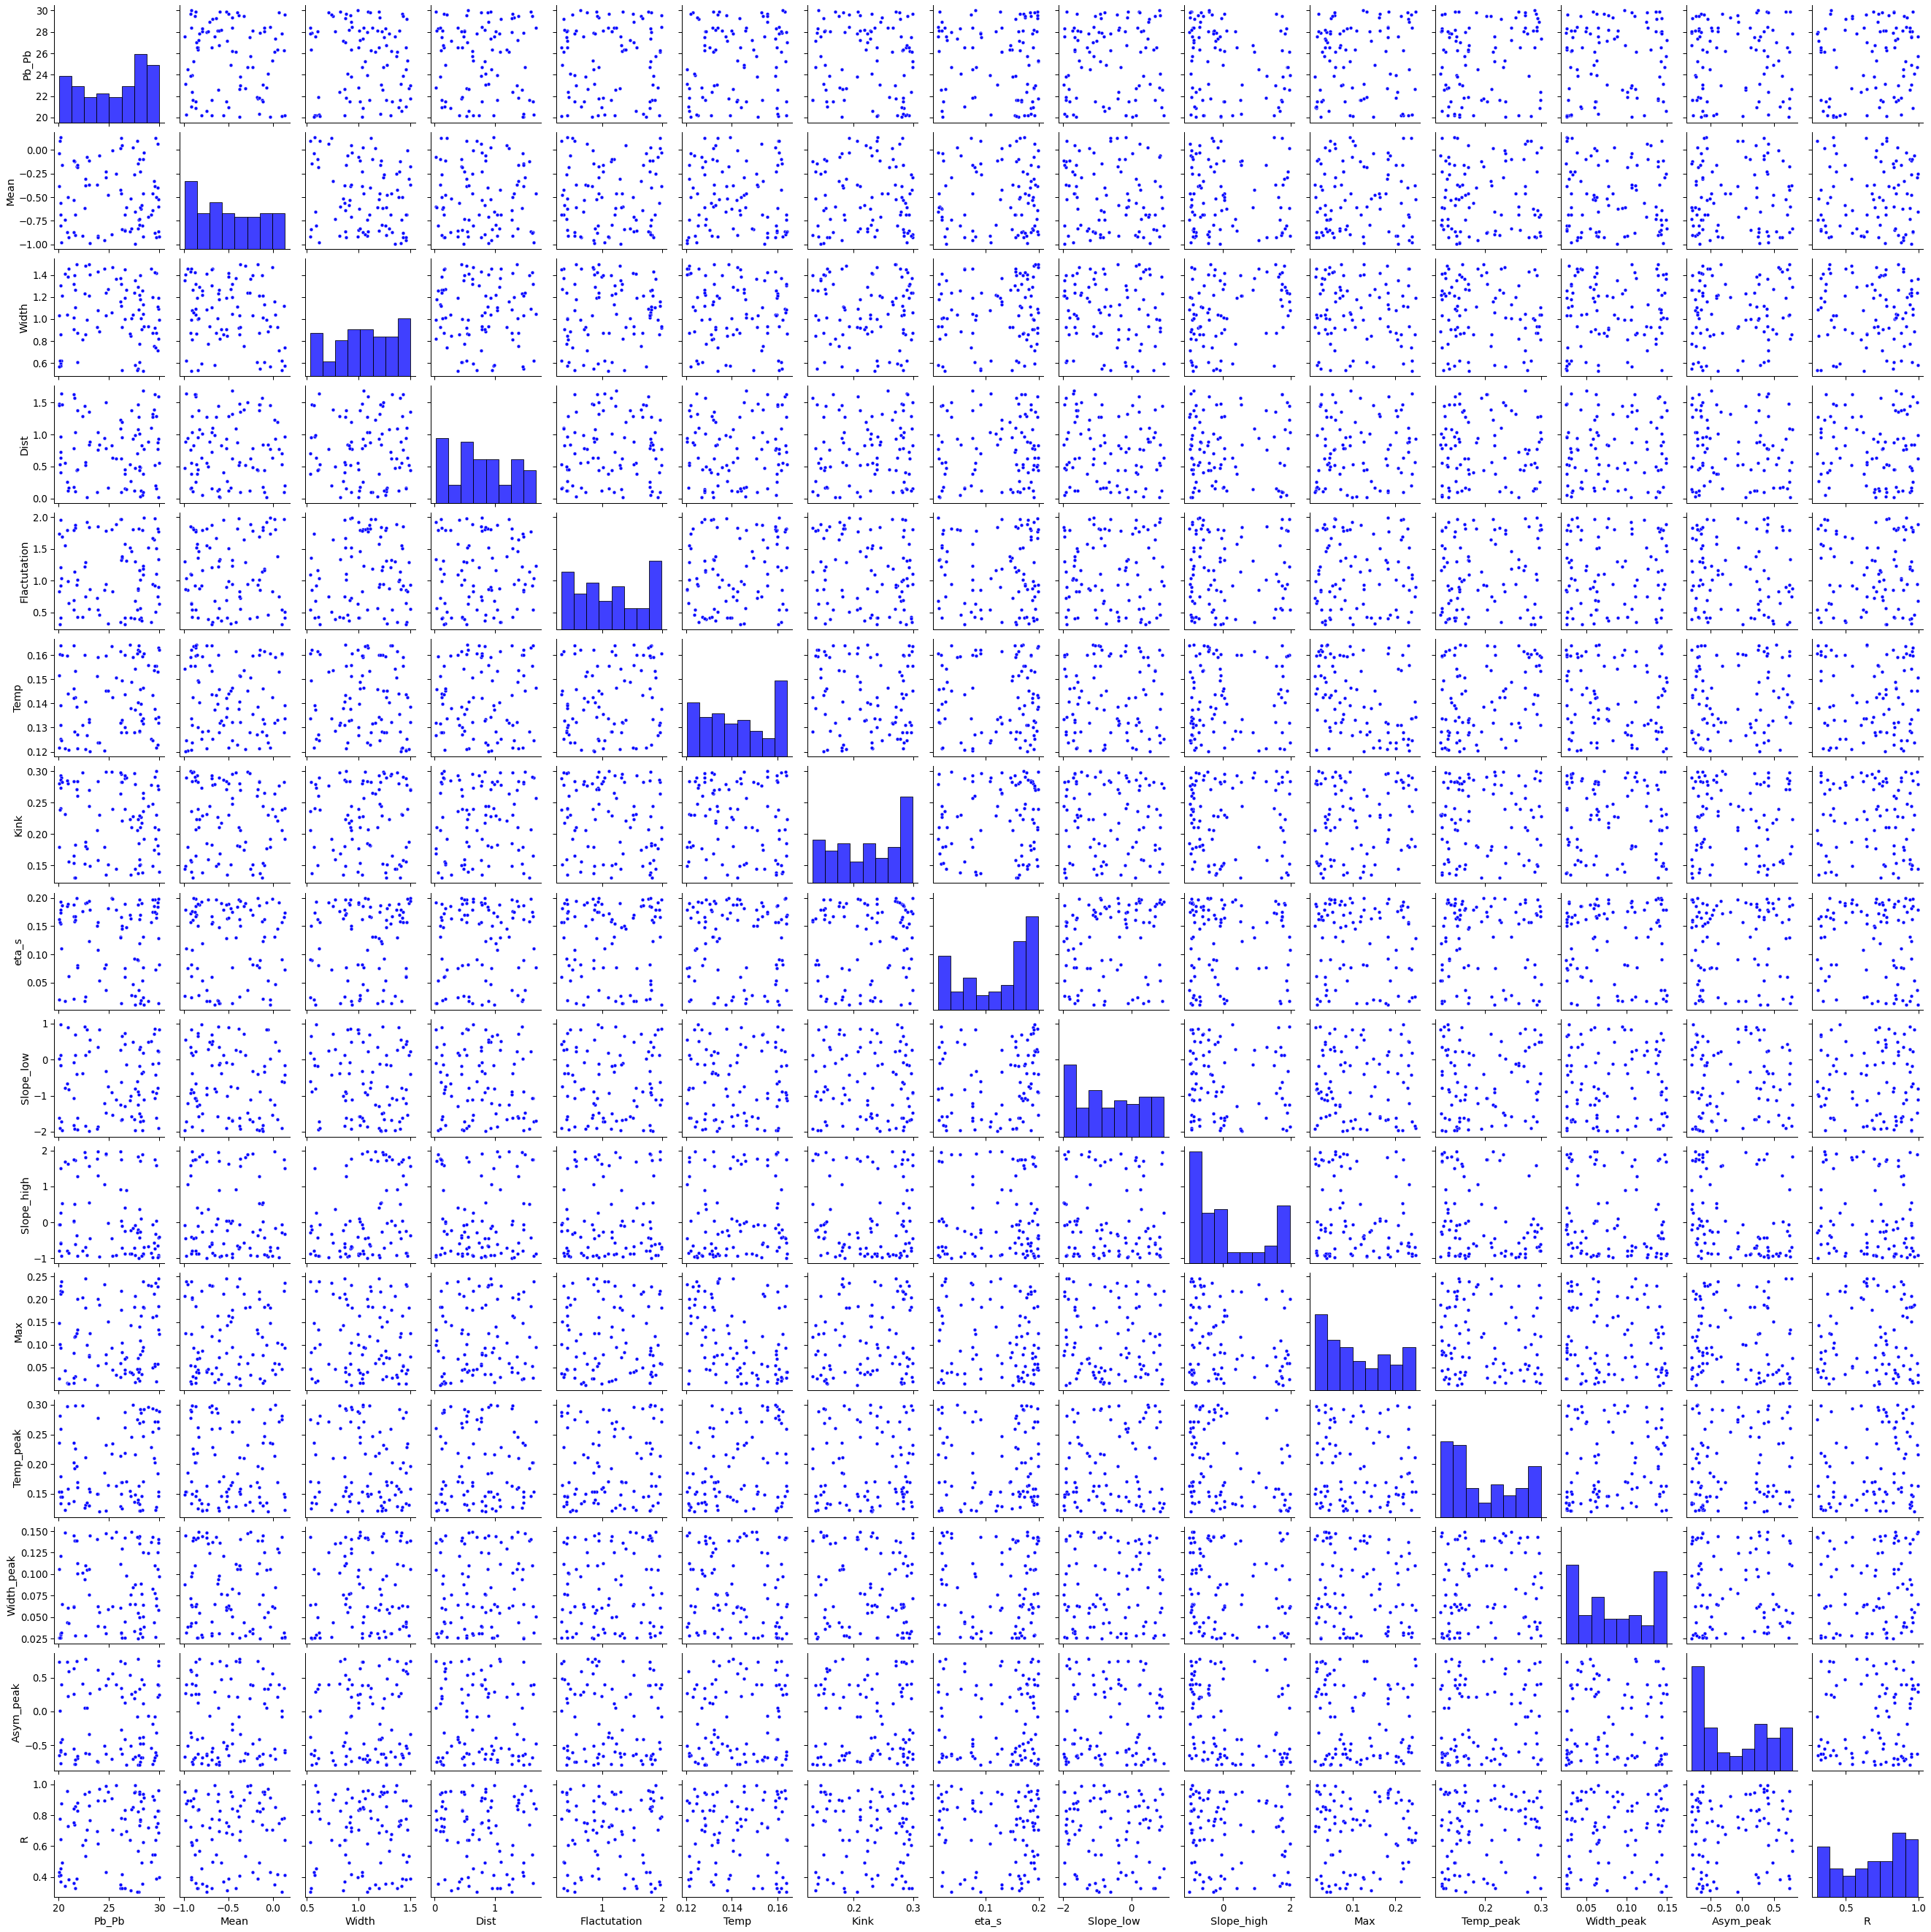

In [12]:
# Let's try to visualize the designs
compare = [2,3]
colors = ['red', 'blue']
#ax. fig = plt.subplots()
for i,fi in enumerate(compare):
    df_combined = pd.concat([df_list[fi].design, df_list[fi].events], axis=1)
#df_combined = df_combined[df_combined['nevents']<max(df_combined.nevents)*0.8]
    sns.pairplot(df_combined.drop(['design','nevents'], axis=1), diag_kind='hist', 
                 plot_kws={'color':colors[i]}, diag_kws={'color':colors[i]})

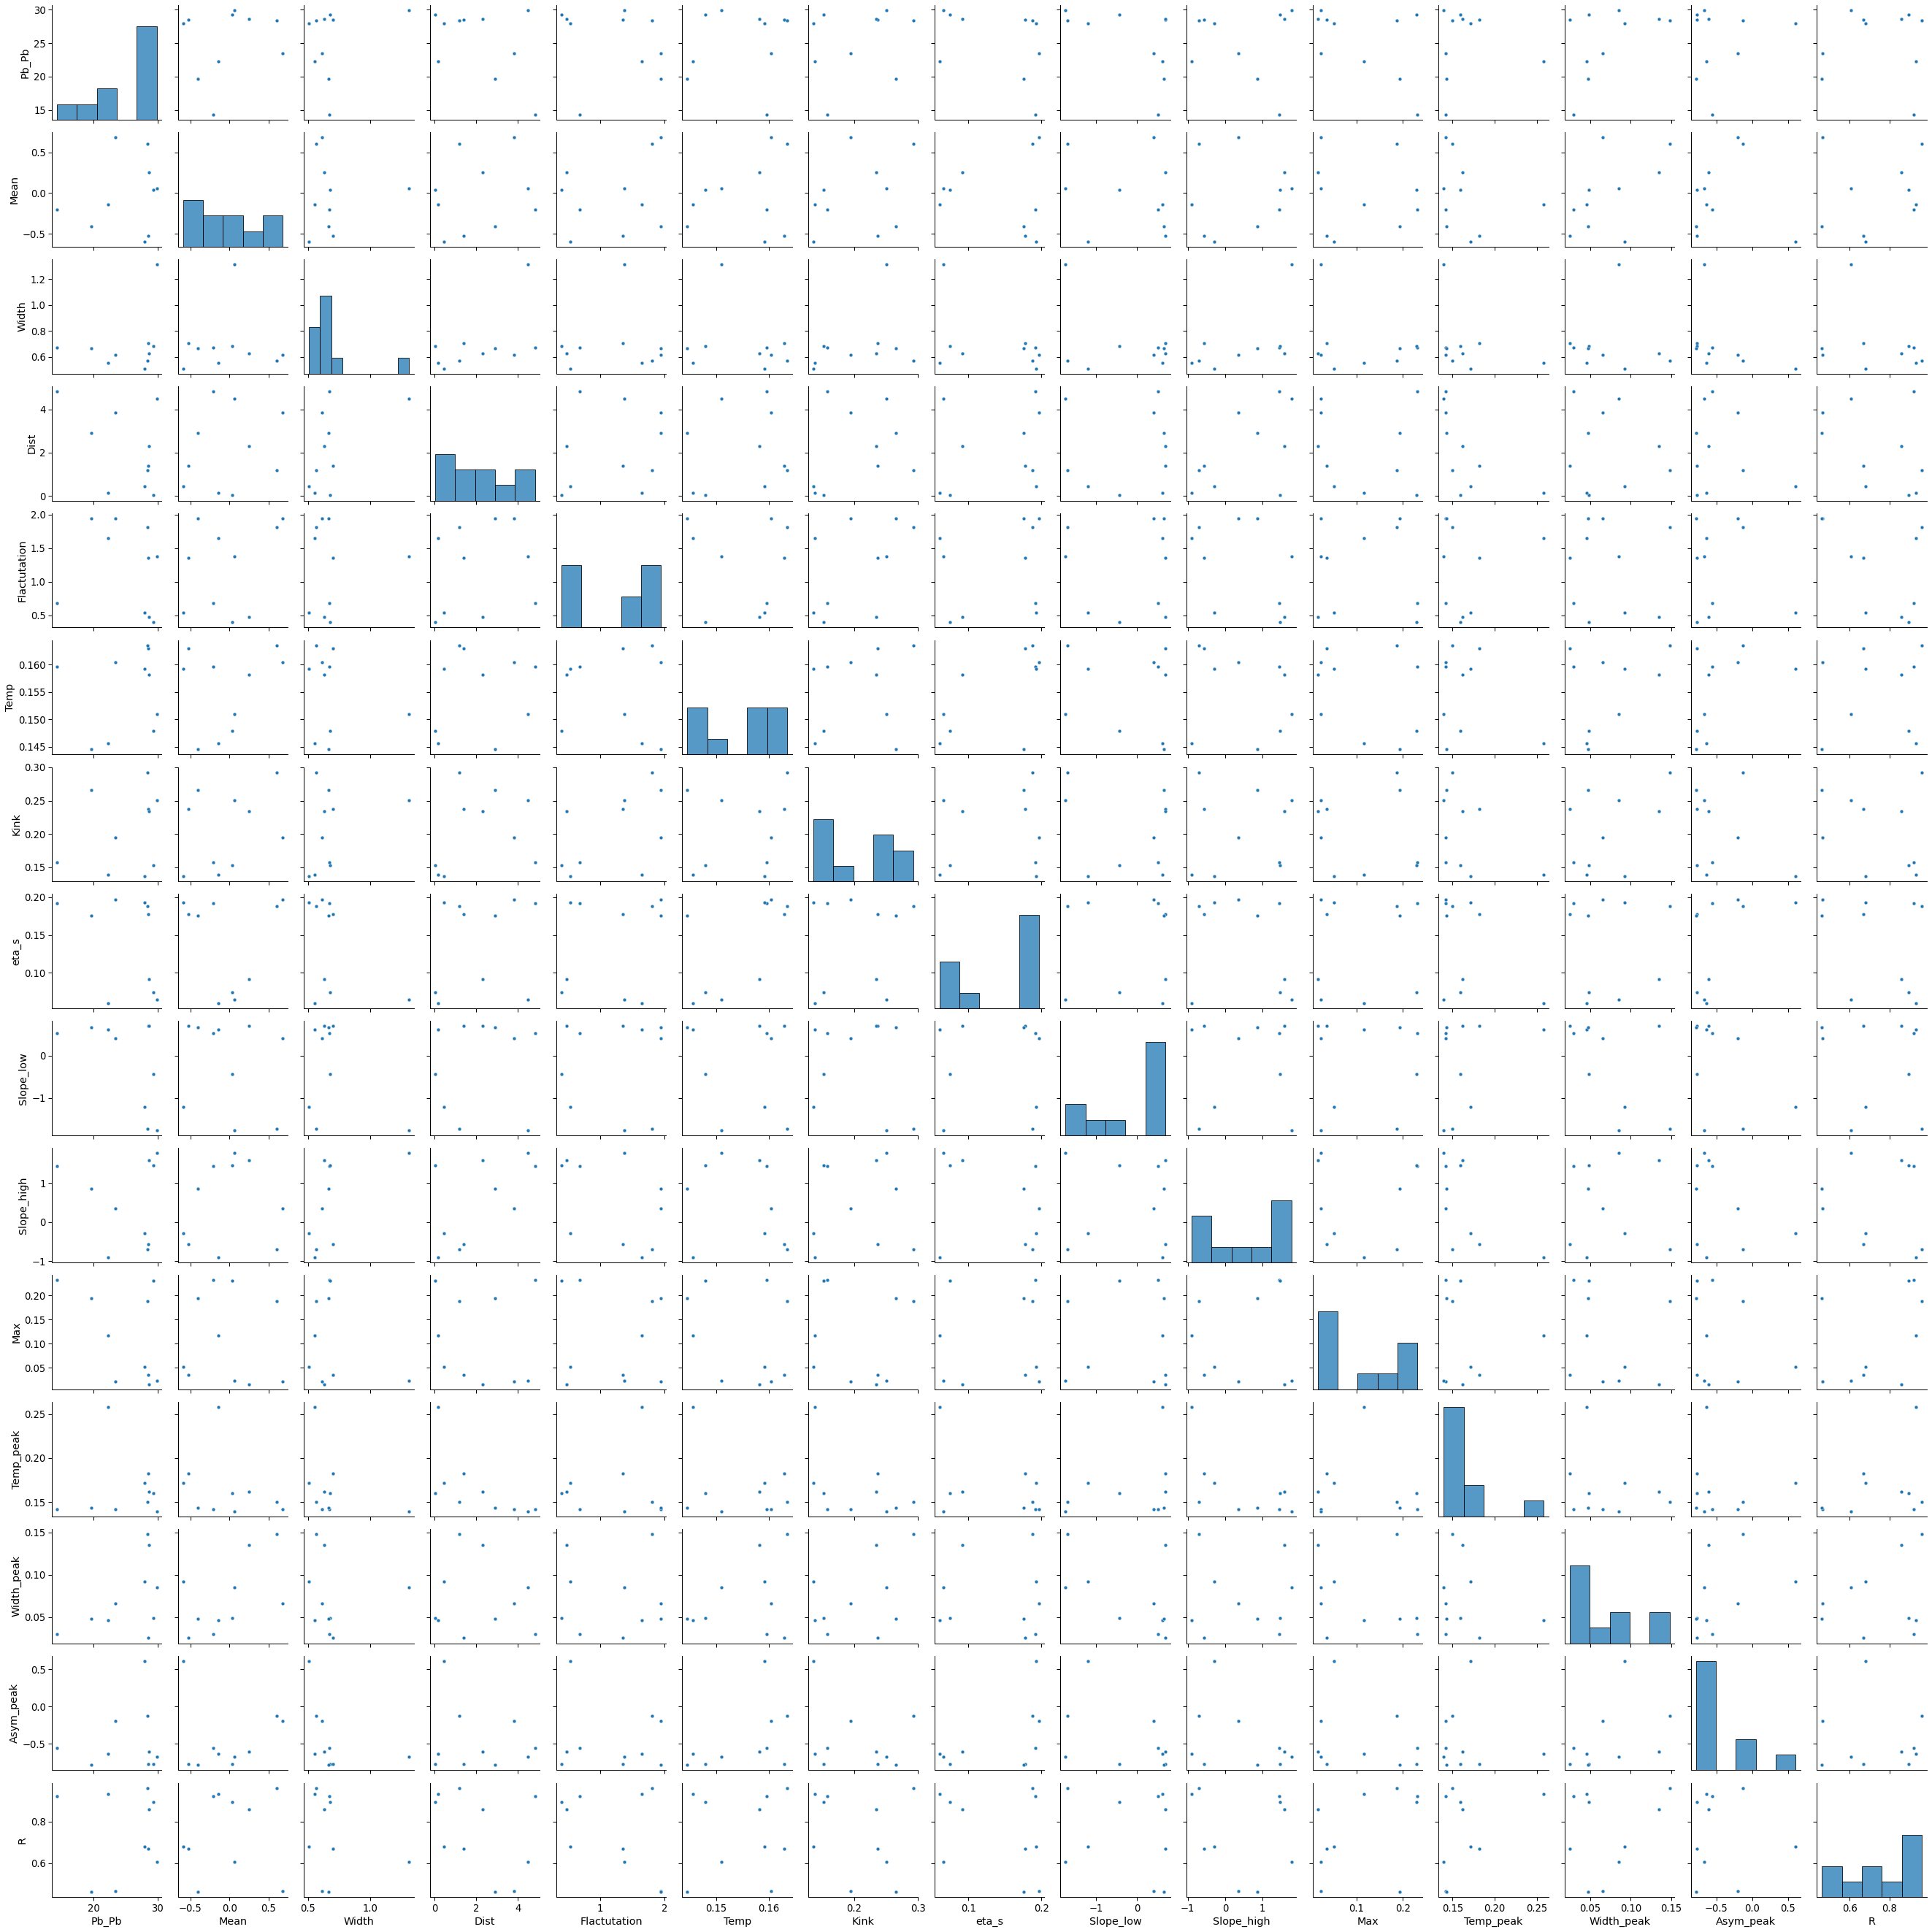

In [28]:
# Let's try to see if there is a clear pattern for failing designs.
i=-1
df_combined = pd.concat([df_list[i].design, df_list[i].events], axis=1)
df_combined = df_combined[df_combined['nevents']<max(df_combined.nevents)*0.8]
sns.pairplot(df_combined.drop(['design','nevents'], axis=1), diag_kind='hist')
#bins = [0, 400, 500, 650, 800]
#labels =['bad','poor','avg','good']
#df_combined['binned'] = pd.cut(df_combined['nevents'], bins,labels=labels)
#sns.pairplot(df_combined.drop(['tau_initial','design','nevents'], axis=1),hue='binned', diag_kind='hist')

In [40]:
#df_list[0].obs.keys()

(300, 140)
(90, 140)
(90, 140)
(90, 140)
(75, 140)


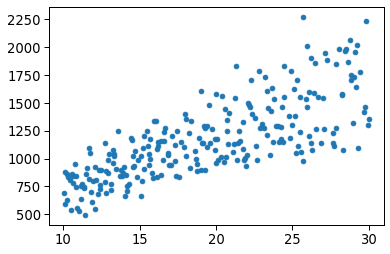

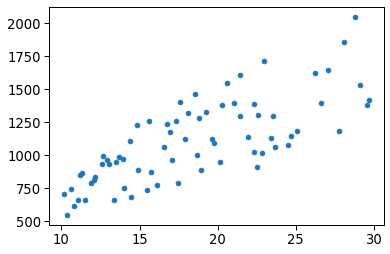

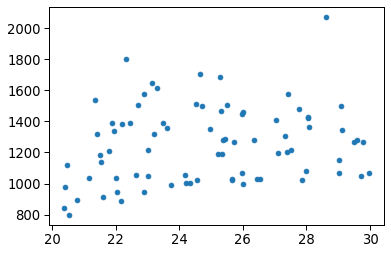

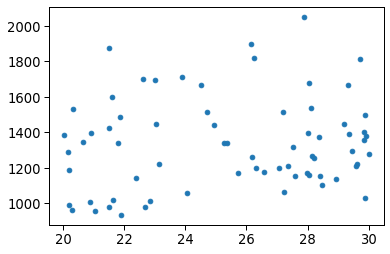

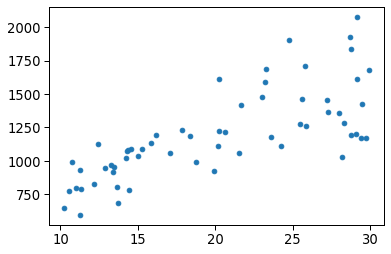

In [45]:
# Sanity Check
for i in range(0,5):
    df_combined = pd.concat([df_list[i].design, df_list[i].obs, df_list[i].events], axis=1)
    print(df_combined.shape)
    df_combined = df_combined[df_combined['nevents']>max(df_combined.nevents)*0.9]
    #print(df_combined.head())
    x = df_combined['Pb_Pb']
    y = df_combined['dNch_deta_[0 5]']
    fig, ax = plt.subplots()
    ax.scatter(x,y)

